##Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = '/content/drive/MyDrive'

data = pd.read_csv('{}/balanced_bin_agg.csv.gz'.format(DATA_DIR)).iloc[:, 1:]


In [12]:
len(data)

711452

In [13]:
df = data.sample(1_000).fillna(0)

In [14]:
df.head()

,min_answer_time,max_answer_time,mean_answer_time,std_answer_time,mode,feedback_mode,force_reflection,timer,is_solo,title_lang,title_len,title_topic,mean_video,mean_image,mean_correctness,std_correctness,n_answers,response
231223,0.0,0.000003,1.410344e-06,9.632046e-07,0.0,0.0,0.0,0.024369,0.0,0.914894,0.312500,0.25,0.0,0.000000,0.793000,0.362156,10,happy
453159,0.0,0.000043,1.225056e-05,1.405358e-05,0.0,0.0,0.0,0.038194,0.0,0.914894,0.414062,1.00,0.0,0.250000,0.750000,0.462910,8,not_happy
405647,0.0,0.000001,6.699249e-07,4.195822e-07,0.0,1.0,0.0,0.024369,0.0,0.702128,0.109375,1.00,0.0,0.000000,0.400000,0.516398,10,not_happy
543445,0.0,0.000022,2.435265e-06,4.276009e-06,0.0,1.0,0.0,0.031250,0.0,0.159574,0.171875,0.75,0.0,0.103448,0.655172,0.483725,29,not_happy
203146,0.0,0.000018,6.181998e-06,5.599175e-06,0.0,0.0,0.0,0.027778,0.0,0.914894,0.335938,1.00,0.0,0.333333,0.888889,0.333333,9,happy


##Data cluster visualization

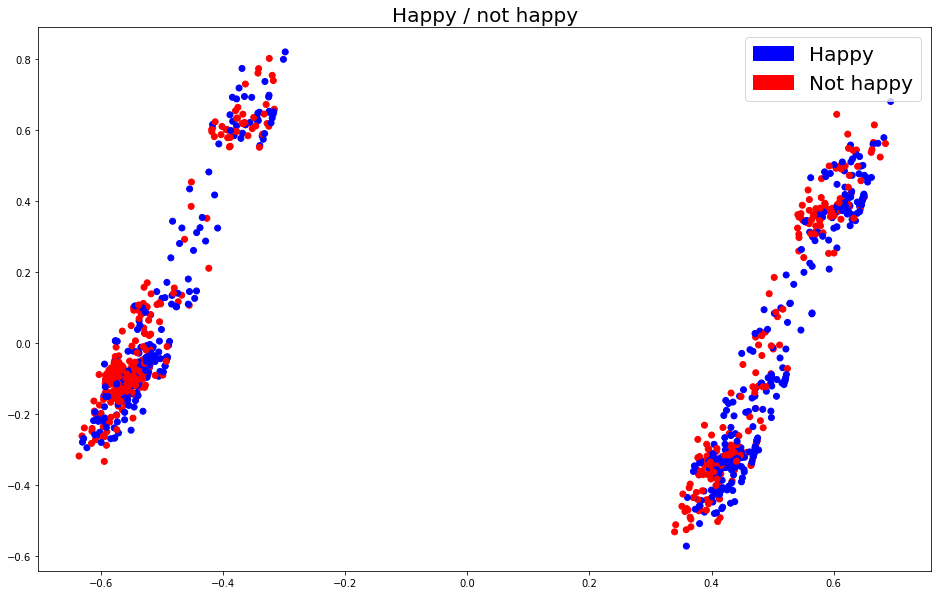

In [18]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

X = df.drop(["response", "n_answers"], axis="columns").to_numpy()

# pca
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
# plot ground truth 
fig = plt.figure(figsize = (16,10))
ax = fig.gca()
ax.set_title(f"Happy / not happy", fontsize=20)
blue_patch = mpatches.Patch(color='blue', label='Happy')
red_patch = mpatches.Patch(color='red', label='Not happy')
ax.legend(handles=[blue_patch, red_patch], fontsize=20)
ax.scatter(data2D[:,0], data2D[:,1], c=['blue' if p else 'red' for p in df.response == "happy"])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


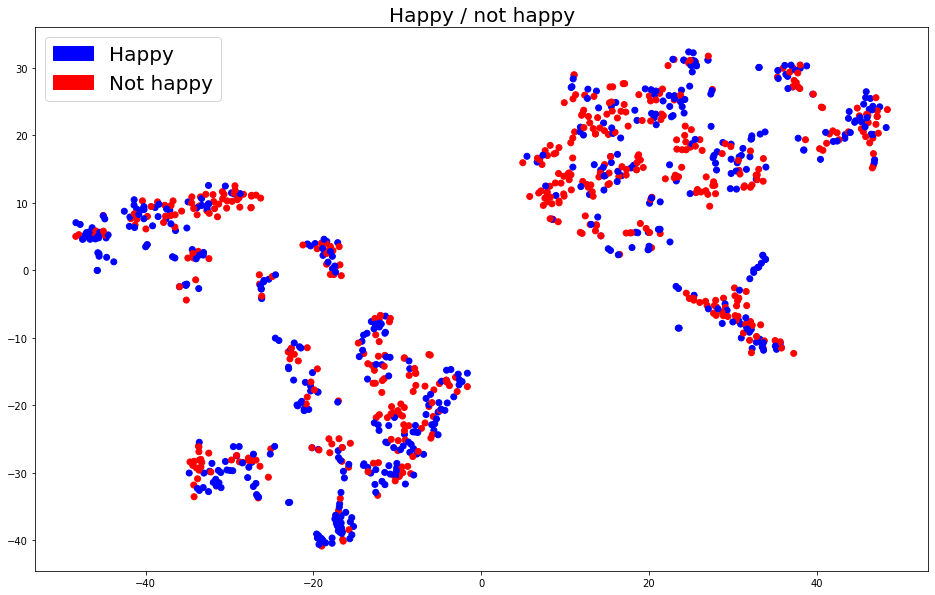

In [19]:
from sklearn import decomposition
from sklearn import manifold

# tsne
data2D = manifold.TSNE(n_components=2,random_state=42).fit_transform(X)
# plot ground truth 
fig = plt.figure(figsize = (16,10))
ax = fig.gca()
ax.set_title(f"Happy / not happy", fontsize=20)
blue_patch = mpatches.Patch(color='blue', label='Happy')
red_patch = mpatches.Patch(color='red', label='Not happy')
ax.legend(handles=[blue_patch, red_patch], fontsize=20)
ax.scatter(data2D[:,0], data2D[:,1], c=['blue' if p else 'red' for p in df.response == "happy"])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


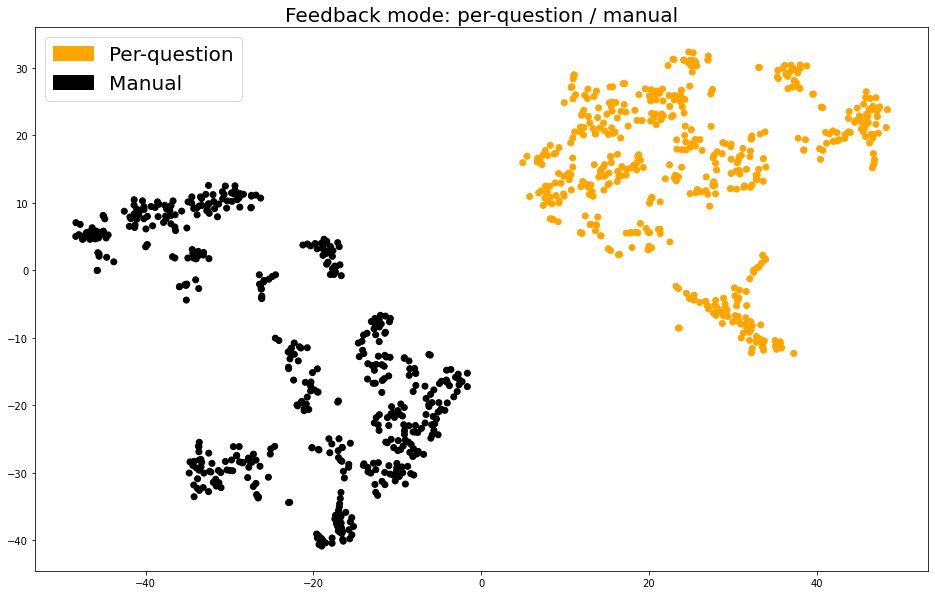

In [21]:
from sklearn import decomposition
from sklearn import manifold

# tsne
data2D = manifold.TSNE(n_components=2,random_state=42).fit_transform(X)
# plot ground truth 
fig = plt.figure(figsize = (16,10))
ax = fig.gca()
ax.set_title(f"Feedback mode: per-question / manual", fontsize=20)
blue_patch = mpatches.Patch(color='orange', label='Per-question')
red_patch = mpatches.Patch(color='black', label='Manual')
ax.legend(handles=[blue_patch, red_patch], fontsize=20)
ax.scatter(data2D[:,0], data2D[:,1], c=['orange' if p else 'black' for p in df.feedback_mode == 0])

In [23]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LinearColorMapper
from bokeh.colors import RGB
output_notebook()

In [24]:
df.head(1)

,min_answer_time,max_answer_time,mean_answer_time,std_answer_time,mode,feedback_mode,force_reflection,timer,is_solo,title_lang,title_len,title_topic,mean_video,mean_image,mean_correctness,std_correctness,n_answers,response
231223,0.0,0.000003,0.000001,9.632046e-07,0.0,0.0,0.0,0.024369,0.0,0.914894,0.3125,0.25,0.0,0.0,0.793,0.362156,10,happy


In [27]:
TOOLTIPS=[
          ('Response', '@response'),
          ("Mean answer time", "@mean_answer_time"),
          ("Mode", "@mode"), 
          ("Feedback mode", "@feedback_mode"), 
          ("Force reflection", "@force_reflection"),
          ("Timer", "@timer"), 
          ("Is solo", "@is_solo"), 
          ("Title lang", "@title_lang"), 
          ("Title len", "@title_len"), 
          ("Title topic", "@title_topic"), 
          ("Mean video", "@mean_video"), 
          ("Mean image", "@mean_image"), 
          ("Mean correctness", "@mean_correctness"),
          ('# of answers', '@n_answers')
          ]
# TSNE
data2D = manifold.TSNE(n_components=2,random_state=42).fit_transform(X)
p = figure(title=f"TSNE projection of participants", height=700, width=1100, tooltips=TOOLTIPS)

palette = ("#000000","#db6d00", "#000000","#009292","#ff6db6","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#920000","#24ff24","#db6d00","#ffff6d")
col = df.mean_correctness
m=min(col)
M=max(col)
colors = [RGB(100, 100, 55+200*(c-m)/(M-m)) for c in col]

source = ColumnDataSource(data=dict(x=data2D[:,0], y=data2D[:,1], color=colors, response=df.response, mean_answer_time=df.mean_answer_time, feedback_mode=df.feedback_mode,
                                    force_reflection=df.force_reflection, timer=df.timer, is_solo=df.is_solo, title_lang=df.title_lang, title_len=df.title_len,
                                    title_topic=df.title_topic, mean_video=df.mean_video, mean_image=df.mean_image, mean_correctness=df.mean_correctness,
                                    n_answers=df.n_answers))
p.circle(x="x", y="y", source=source, size=7, color="color", line_color=None, fill_alpha=1)

show(p) # show the results

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


##Title features visualization

In [ ]:
data2 = pd.read_csv('{}/imputed_answers.csv.gz'.format(DATA_DIR)).iloc[:, 1:]

In [ ]:
data2.head()

,answer_time,mode,feedback_mode,force_reflection,timer,is_solo,title_lang,title_len,title_topic,video,image,correctness,nth_answer,response
0,77.88728,flexible,manual,False,3600.0,False,uk,21.0,unknown,False,False,1.0,0,happy
1,75.83723,flexible,manual,False,3600.0,False,uk,21.0,unknown,False,False,1.0,1,happy
2,34.69142,flexible,manual,False,3600.0,False,uk,21.0,unknown,False,False,1.0,2,happy
3,32.70266,flexible,manual,False,3600.0,False,uk,21.0,unknown,False,False,1.0,3,happy
4,117.96357,flexible,manual,False,3600.0,False,uk,21.0,unknown,False,False,1.0,4,happy


In [ ]:
data2.title_lang = data2.title_lang.map({"uk": "Ukrainian", "en": "English", "ru": "Russian", "de": "German", "bg":"Bulgarian","kk":"Kazakh",
                                         "es": "Spanish", "sr": "Serbian"})

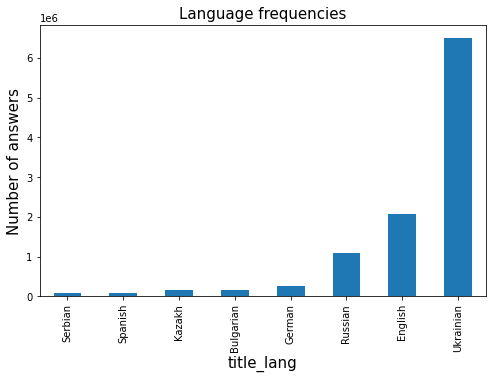

In [ ]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
plt.xlabel("Language", fontsize=15)
plt.ylabel("Number of answers", fontsize=15)
plt.title("Language frequencies", fontsize=15)
data2.groupby("title_lang").title_lang.count().sort_values()[-8:].plot.bar()

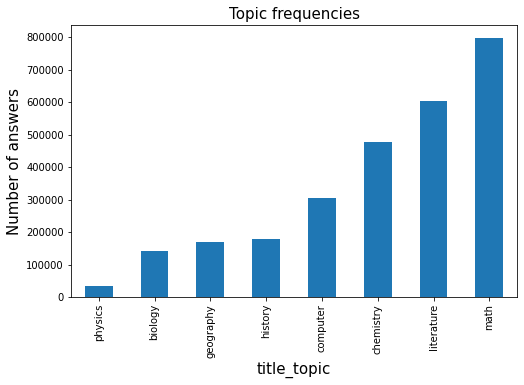

In [ ]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
plt.xlabel("Topic", fontsize=15)
plt.ylabel("Number of answers", fontsize=15)
plt.title("Topic frequencies", fontsize=15)
data2[data2.title_topic != "unknown"].groupby("title_topic").title_topic.count().sort_values().plot.bar()

In [4]:
data3 = pd.read_csv('{}/session_information.csv.gz'.format(DATA_DIR)).iloc[:, 1:]


In [5]:
tops = ["computer", "history", "chemistry", "geography", "math", "literature", "physics", "biology"]

In [6]:
wordsss=[["programming", "computer", "software", "audio", "personal_computer", "digital_technology", "digital", "programming", "programmers", "analog", "TiVo", "computers", "Internet", "PC", "computer_network", "bandwidth", "instant_messaging", "interactivity", "personal_computers", "new_software", "modems", "broadband", "Wi-Fi", "computer_technology", "network", "technology", "computing", "desktop", "HDTV", "modem", "high-definition_television", "computer_users", "cable", "graphics", "Bluetooth", "VCR", "wireless", "mainframe", "computer_networks", "Web", "digital_information", "television_programming", "video", "Internet_technology", "spreadsheet", "software_program", "desktop_computer", "Prodigy", "digital_signals", "Internet_services", "networking", "cable_television", "word_processing", "computer_graphics", "Web_pages", "the_World_Wide_Web", "networks", "spreadsheets", "desktop_computers", "systems", "home_shopping", "new_media", "user", "Internet_service", "new_technology", "frequencies", "channel", "users", "desktop_publishing", "computer_data", "Microsoft_software", "CD-ROM", "wirelessly", "set-top_boxes", "wireless_technology", "home_computers", "Internet_access", "digital_cameras", "wireless_networks", "satellite", "wireless", "high-speed_Internet_access", "microprocessor", "work_stations", "wireless_network", "Web_browser", "Macintosh", "camcorder", "many_users", "software_applications", "digital_music", "software_programs", "remote_control", "electronic_mail", "electronic", "circuits", "home_computer", "new_computer", "cable_modems", "MP3_files", "interactive_television", "other_computers", "audio", "MP3", "format", "animation", "laptops", "laptop", "operating_system", "computer_software", "new_features", "same_technology", "information_services", "program", "MSN", "Internet_connections", "AOL", "interactive_services", "Linux", "iPod", "browser", "servers", "technologies", "mainframes", "portable_computers", "Internet_connection", "latest_technology", "video_games", "data_bases", "hard_disk", "messaging", "Compuserve", "hardware", "satellite_radio", "multimedia", "printers", "set-top_box", "America_Online", "D.S.L.", "software_developers", "word_processors", "infomercials", "computer_games", "processing_power", "microprocessors", "computer_user", "digital_media", "new_medium", "digital_television", "computer_programs", "line_service", "channels", "facsimile_machines", "telephone_network", "America_Online", "data_networks", "wireless_phones", "routers", "cable_TV", "operating_systems", "OS/2", "digital_form", "pagers", "playback", "Notes", "home_entertainment", "data_services", "search_engines", "circuitry", "Ethernet", "cyberspace", "high-speed_Internet_connections", "Yahoo", "machines", "electronic_devices", "entertainment_programming", "machine", "mainframe_computers", "PC_users", "hard_drive", "computer_work_stations", "computer_chip", "cable_channels", "other_software", "new_channels", "phone_lines", "cable_system", "broadcasting", "playlists", "digital_images", "video_programming", "electronic_media", "computer_systems", "personal_digital_assistants", "dial", "wireless_devices", "Internet_service_provider", "Nintendo", "sound_quality", "work_station", "MTV", "electronically", "cellphones", "microchips", "downloading", "new_computers", "PC.", "Unix", "local_stations", "digital_video", "D.S.L.", "disk_drives", "telephony", "computer_program", "television", "programmer", "new_services", "peripherals", "device", "interactive_media", "radio_frequencies", "interface", "Windows_operating_system", "devices", "enhancements", "new_machine", "new_machines", "Web_page", "cable_modem", "scanners", "Adobe", "Lotus", "computer_code", "Web_sites", "new_technologies", "video_conferencing", "powerful_computers", "Palm", "VCR", "XM", "cable_networks", "Photoshop", "electronic_commerce", "iPod", "Google", "software_tools", "Internet_sites", "gamers", "music_videos", "wireless_communications", "printer", "minicomputers", "paging", "digital_age", "business_customers", "features", "video-on-demand", "laser_printers", "computer_hardware", "video_technology", "Netscape", "content", "music_files", "Internet_Explorer", "Macintosh_computers", "Sirius", "line_services", "e-mail", "digital_photography", "databases", "computer_mouse", "local_news", "special_software", "Linux_operating_system", "new_device", "RealNetworks", "other_systems", "Sony", "digitally", "fiber_optics", "computing_power", "disk_drive", "television_programs", "downloading", "phone_companies"],
      ["History", "history", "American_history", "world_history", "cultural_history", "American_literature", "Civilization", "Jewish_history", "present_day", "military_history", "Literature", "social_history", "Chinese_history", "annals", "political_history", "Western_history", "historian", "Tradition", "Revolution", "black_experience", "Religion", "last_100_years", "Jewish_experience", "mythology", "German_history", "subtitle", "first_volume", "Russian_history", "recent_book", "African-American_history", "Geography", "whole_history", "author", "treatise", "black_history", "American_experience", "Poetry", "history_books", "Evolution", "Enlightenment", "new_history", "Making", "immigrant_experience", "forthcoming_book", "European_history", "African-American_experience", "chronicle", "Politics", "Modernism", "the_20th_century's", "modern_times", "entire_history", "Western_civilization", "Slavery", "historical_novel", "literary_criticism", "previous_book", "intellectual_history", "French_Revolution", "Photography", "American_civilization", "Origins", "human_history", "new_book", "Thucydides", "Reformation", "Western_art", "genealogy", "400_years", "Enlightenment"],
       ["atom", "particle", "molecules", "isotopes", "molecule", "buckyballs", "neutrinos", "subatomic_particles", "fission", "electron", "atoms", "superconductivity", "deuterium", "neutrons", "chemical_reactions", "hydrogen", "superconductor", "superconductors", "hydrogen_atoms", "living_cells", "nuclei", "neutrino", "living_organisms", "molecular_biology", "human_brain", "molecular_structure", "synthesizing", "RNA", "mitochondria", "quantum", "early_universe", "chemistry", "spectrometer", "magnetic_fields", "gamma_rays", "nuclear_fusion", "proton", "radioactive_decay", "elementary_particles", "proteins", "neutron", "accelerators", "experimenters", "black_holes", "electrons", "hemoglobin", "particles", "quarks", "physics", "practical_applications", "human_cells", "new_technique", "genetic_code", "DNA.", "antiprotons", "plasma", "ions", "particle_physics", "ordinary_matter", "string_theory", "physiology", "growth_factors", "neurons", "amino_acids", "electric_charge", "protons", "test_tube", "antimatter", "cosmic_rays", "nanotechnology", "nitric_oxide", "quantum_theory", "nanotubes", "quantum_mechanics", "tiny_particles", "human_body", "water_vapor", "chemical_composition", "organism", "high-energy_physics", "biology", "fruit_fly", "cosmology", "transistor", "enzymes", "computer_simulations", "photosynthesis", "Higgs", "polymers", "chemists", "isotope", "plate_tectonics", "magnetic_field", "photon", "astrophysics", "electron_microscope", "optics", "quark", "synthesized", "chemical_reaction", "carbon", "silicon", "neuroscience", "climate_system", "enzyme", "synapses", "combustion", "RNA", "electromagnetism", "hippocampus", "cell_division", "superconducting", "space-time", "sequencing", "glutamate", "dopamine", "astronomy", "nuclear_physics", "nerve_cells", "methane", "physicists", "embryonic_cells", "upper_atmosphere", "barium", "building_blocks", "fruit_flies", "laser_light", "photons", "general_relativity", "polymer", "boron", "nuclear_fission", "gases", "cognition", "free_radicals", "chemical_analysis", "p53", "equations", "human_DNA", "skin_cells", "genetic_material", "receptor", "Fermilab", "biochemistry", "genetics", "amino_acid", "water_molecules", "neutron_stars", "antibody", "brain_cells", "double_helix", "amygdala", "cell_death", "compression", "the_Big_Bang", "artificial_intelligence", "supernovas", "complex_systems", "computer_modeling", "organisms", "silicon_chip", "dark_matter", "algorithm", "neutron_star", "thermodynamics", "comets", "synthesis", "lasers", "single_gene", "genome", "new_knowledge", "collagen", "solar_radiation", "molecular", "nerve_fibers", "meteorology", "neuron", "genomes", "other_genes", "simulations", "carbon_atoms", "centrifuge", "nervous_system", "human_gene", "cortex", "telomerase", "infrared_radiation", "microbes", "weightlessness", "periodic_table", "decoding", "quasars", "visible_light", "genomics", "new_genes", "recent_advances", "meteorites", "expanding_universe", "practical_use", "new_materials", "connective_tissue", "human_disease", "anatomy", "robotics", "synthesize", "pulsar", "Dr._Turner", "crystals", "molecular_level", "blood_cells", "calcium_carbonate", "sequencing", "receptors", "RHIC", "neurotransmitter", "new_field", "genetic", "human_genome_project", "light_waves", "electric_current", "Physicists", "the_California_Institute_of_Technology", "computation", "helium", "human_cell", "computer_simulation", "protein", "glucose", "molecular_biologists", "genetic_engineering", "planetary", "tumor_cells", "neuroscientists", "purified", "Dr._Crick", "magnetism", "sound_waves", "muscle_cells", "microbe", "alchemy", "pheromones"],
["geography", "map", "continent", "frontier", "region", "maps", "country", "terrain", "regions", "culture", "Central_Asia", "frontiers", "islands", "national_boundaries", "history", "cultures", "globe", "entire_country", "archipelago", "topography"],
["math", "calculus", "arithmetic", "mathematics", "algebra", "phonics", "basic_skills", "standardized_tests", "proficiency", "foreign_language", "S.A.T.", "test_scores", "SAT", "SAT", "standardized_test", "S.A.T.", "standardized_test_scores", "S.A.T._scores", "grade_levels", "SAT_scores", "social_studies", "reading_skills", "admissions_process", "curriculum", "foreign_languages", "core_curriculum", "critical_thinking", "higher_grades", "early_grades", "exams", "curriculums", "most_students", "student_performance", "academic_achievement", "academic_performance", "grammar", "math_skills", "math_tests", "Regents_exams", "I.Q._tests", "grades", "trigonometry", "writing_skills", "lower_grades", "other_classes", "graduation_rates", "memorization", "liberal_arts", "student_achievement", "language_arts", "special_education", "aptitude", "school_performance", "biology", "other_disciplines", "American_students", "higher_scores", "state_tests", "science", "communication_skills", "class_size", "remedial_work", "electives", "how_many_students", "American_schools", "computer_skills", "few_students", "new_curriculum", "small_classes", "geometry", "language_skills", "whole_language", "courses", "grade_inflation", "equations", "standardized_testing", "such_courses", "smaller_classes", "formulas", "syllabus", "computation", "reading_scores", "textbooks", "bilingual_programs", "social_skills", "multiplication", "dropout_rates", "remedial_courses", "disabled_students", "many_schools", "disciplines", "such_students", "high_school_graduates", "methodology", "academic_subjects", "math_problems", "grade_level", "minority_students", "bilingual_classes", "teaching", "science_teachers", "physics", "academic_success", "special_education_students", "parental_involvement", "new_test", "literacy", "admissions_officers", "teaching_methods", "college_admissions", "instruction", "more_students", "work_experience", "standardized", "elementary_level", "graduate_schools", "computer_programming", "regular_classrooms", "most_colleges", "sciences", "other_professions", "exam", "national_tests", "humanities", "subject_areas", "high_scores", "computer_science", "math_scores", "course_work", "probabilities", "technical_skills", "many_teachers", "higher_education", "third_graders", "college_applications", "equation", "undergraduates", "regular_classes", "black_and_Hispanic_students", "high_school_level", "vocabulary", "concepts", "eighth_graders"],
["book", "writing", "read", "writing", "literature", "Nabokov", "poetry", "preface", "essays", "poems", "fiction", "Faulkner", "Proust", "other_writers", "reading", "own_book", "author", "journals", "write", "literary_criticism", "Kafka", "Dostoyevsky", "textbook", "novels", "nonfiction", "Dickens", "dictionary", "Eliot", "reread", "essay", "Henry_James", "Jane_Austen", "English_language", "Yeats", "many_books", "Borges", "translations", "young_readers", "Mr._Updike", "Orwell", "Virginia_Woolf", "biographies", "Tolstoy", "reading_list", "Flaubert", "such_books", "writes", "general_reader", "writings", "afterword", "verse", "encyclopedia", "Mr._Bellow", "short_stories", "Auden", "Austen", "dictionaries", "books", "written", "Robert_Frost", "historical_fiction", "whole_book", "biography", "Twain", "Writing", "acknowledgments", "novelist", "Hemingway", "other_books", "memoirs", "short_story", "entire_book", "Reading", "Mencken", "first_book", "first_chapter", "literary_critic", "Poe", "poem", "Woolf", "foreword", "Plato", "The_New_York_Review_of_Books", "T._S._Eliot", "James_Joyce", "bibliography", "Wallace_Stevens", "translation", "Wolfe", "wrote", "Rilke", "Dreiser", "biographer", "The_New_York_Times_Book_Review", "Chaucer", "second_book", "Sartre", "Nietzsche", "footnotes", "own_writing", "Saul_Bellow", "dust_jacket", "Amis", "texts", "magazine_articles", "manuscript", "John_Updike", "great_books", "Bellow", "other_authors", "Bible", "William_Faulkner", "Trollope", "anthologies", "Ulysses", "writer", "Mr._Mailer", "treatise", "book_reviews", "anthology", "Freud", "poet", "Mailer", "Edmund_Wilson", "Philip_Roth", "Walter_Benjamin", "literary_history", "prose", "Graham_Greene", "New_Testament", "Harold_Bloom", "Aristotle", "short_fiction", "Plath", "Baudelaire", "sonnet", "grammar", "Charles_Dickens", "Franz_Kafka", "Tolkien", "American_literature", "longhand", "new_book", "American_writers", "J._D._Salinger", "same_book", "haiku", "Flannery_O'Connor", "novel", "earlier_books", "blurbs", "reading", "rereading", "great_writer", "Sylvia_Plath", "Wittgenstein", "first_sentence", "little_book", "Ms._Ozick", "first_volume", "reader", "literary", "quotations", "Spender", "Montaigne", "American_readers", "Oscar_Wilde", "Emily_Dickinson", "Coleridge", "John_Cheever", "next_book", "Keats", "own_words", "many_articles", "Balzac", "Hegel", "art_criticism", "treatises", "diary", "Mr._Naipaul", "autobiography", "romance_novels", "Mr._Amis", "reportage", "obituaries", "own_books", "memoir", "anecdote", "Ezra_Pound", "Lolita", "The_New_Yorker", "sonnets", "collected_works", "Beowulf", "Camus", "authors", "pen_name", "Samuel_Johnson", "new_novel", "W._H._Auden", "Bible", "fictions", "latest_book", "blurb", "readers", "autobiographies", "detective_stories", "Mark_Twain", "Ms._Oates", "Heidegger", "Vladimir_Nabokov", "Old_Testament", "Ginsberg", "magazine_article", "epigraph", "new_biography", "H._L._Mencken", "Moby-Dick", "Kerouac", "Mr._Ambrose", "travel_writing", "Rimbaud", "Cheever", "science_fiction", "Boswell", "earlier_book", "new_edition", "novelists", "general_audience", "astrology", "Sandburg", "Joyce", "Talmud", "Mary_McCarthy", "Updike", "George_Eliot", "Voltaire", "musings", "Forster", "fairy_tales", "Rousseau", "love_letters", "syllabus", "good_books", "previous_books", "diaries", "pseudonym", "biographers", "George_Orwell", "last_page", "Kipling", "spelling", "nonfiction_books", "great_writers", "monograph", "E._M._Forster", "Philip_Larkin", "Mr._Vidal", "many_readers", "Ralph_Ellison", "text", "Steinbeck", "Beauvoir", "Wordsworth", "scholarly", "editing", "D._H._Lawrence", "thrillers", "current_events", "Jung", "Kant", "several_books", "last_book", "William_Carlos_Williams", "Norman_Mailer", "Raymond_Chandler", "aphorisms", "best-selling_books", "Scripture", "great_poet", "Homer", "Robert_Lowell", "Cynthia_Ozick", "Thurber", "new_collection", "Marianne_Moore", "unpublished", "literary_life", "other_novels", "reprinting", "philosopher", "Gertrude_Stein", "reads", "Mr._Irving", "Walt_Whitman", "first_draft", "dissertation", "oral_history", "Thucydides", "Iliad"],
["physics", "mechanics", "quantum_mechanics", "aerodynamics", "quantum", "science", "apparatus", "geometry", "particle", "calculus", "biology", "cosmology", "artificial_intelligence", "force", "craft", "atom", "physicists", "processes", "gravity", "astronomy", "quantum_theory", "quantum", "subatomic_particles", "equations", "disciplines", "mathematics", "electromagnetism"],
["biology", "genetics", "organism", "molecular_biology", "physiology", "genetic", "human_brain", "anatomy", "organisms", "human_cells", "geneticists", "genes", "fruit_flies", "human_evolution", "animal_behavior", "bacterium", "living_organisms", "proteins", "nervous_system", "new_technique", "cognition", "molecular", "genetic_material", "neuroscience", "single_gene", "evolutionary_biology", "gene", "genome", "molecule", "Dr._Wilson", "mutations", "RNA", "human_disease", "cosmology", "Y_chromosome", "practical_applications", "mutation", "biochemistry", "human_body", "stem_cells", "science", "molecular_biologists", "pathology", "DNA.", "physics", "genetic_makeup", "particle", "life_cycle", "brain_development", "molecules", "astronomy", "heredity", "embryo", "geology", "mammals", "new_species", "particle_physics", "neuroscientists", "microbes", "natural_selection", "mitochondrial_DNA", "quantum_mechanics", "genetic_code", "test_tube", "cognitive", "mitochondria", "primates", "biologists", "microbe", "genetic_engineering", "Dr._Snyder", "evolutionary", "genomes", "molecular_structure", "embryonic_cells", "hippocampus", "cancer_cells", "human_behavior", "neurons", "social_behavior", "protein", "psychology", "human_gene", "humans", "nerve_cells", "prions", "chimpanzees", "tumor_cells", "human_development", "living_cells", "geneticist", "Dr._Smith", "pathogen", "neuroscientist", "basic_science", "string_theory", "neurobiology", "brain_cells", "bacteria", "embryonic_stem_cells", "growth_factors", "new_research", "hemoglobin", "fruit_fly", "amygdala", "artificial_intelligence", "Dr._White", "taxonomy", "neutrinos", "hypothesis", "experimenters", "enzyme", "astrophysics", "medical_science", "antibody", "modern_science", "fungi", "Dr._Anderson", "receptor", "quantum_theory", "p53", "Dr._Collins", "cell_division", "parasite", "new_genes", "cell_death", "Dr._Turner", "metabolism", "cortex", "chemistry", "new_knowledge", "receptors", "Dr._Friedman", "human_DNA", "other_organisms", "enzymes", "telomeres", "normal_cells", "fertilization", "viruses", "amino_acids", "anthropology", "sequencing", "meteorology", "cloning", "new_finding", "the_University_of_California_at_Davis", "Dr._Ross", "DNA", "other_researchers", "buckyballs", "Biologists", "superconductivity", "Dr._Williams", "electron", "nitric_oxide", "skin_cells", "electron_microscope", "paleontology", "dopamine", "telomerase", "molecular_level", "isotopes", "nanotechnology", "biologist", "central_nervous_system", "other_genes", "ecology", "genomics", "researchers", "chimps", "pheromones", "research_team", "new_theory", "atom", "gene_therapy", "the_University_of_California_at_San_Diego", "brain", "human_genome", "blood_cells", "insect", "Dr._Miller", "biologically", "physicists", "subatomic_particles", "calculus", "epidemiology", "brain_chemistry", "cancerous_cells", "brain_tissue", "vertebrates", "neutrino", "human_immune_system", "evolutionary_history", "diseases", "synapses", "synthesizing", "Dr._Crick", "human_cell", "behavioral", "computer_science", "molecular_genetics", "Researchers", "neurobiologist", "chemists", "other_viruses", "DNA.", "immunology", "equations", "vector", "living_things", "Dr._Thompson", "algorithm", "T_cells", "antigen", "Homo", "fetal_cells", "fertilized_egg", "new_cells", "chromosomes", "black_holes", "abnormalities", "laboratory_experiments", "evolutionary_theory", "mammal", "human_mind", "collagen", "quantum", "new_science", "aging_process", "genetic_research", "mice", "sequencing", "white_blood_cells", "experimentally", "human_embryonic_stem_cells", "human_genome_project", "other_scientists", "genetic_information", "hypothesized", "cloning", "scientific_method", "scientists", "Dr._Evans", "laboratory", "thermodynamics", "hypothalamus", "cosmos", "cell_biology", "ecologist", "high-energy_physics", "nuclear_physics", "mathematics", "environmental_factors", "ultrasound", "millions_of_years", "leptin", "plate_tectonics", "worm", "psychiatry", "scientific_inquiry", "RNA", "genetic_differences", "toxin", "pharmacology", "microorganisms", "immune_system", "brain_activity", "hominids", "new_discovery", "Dr._Rose", "practical_application", "immune_response", "most_scientists", "linguistics", "experiments", "petri_dish", "Dr._Johnson", "tumors", "botany", "genetic_basis", "atoms", "Scientists", "foreign_genes", "general_relativity", "microbiology", "Dr._Brown", "genetic_disease", "Oregon_State_University"]
      ]


In [ ]:
def get_doc_frequency(data, ww):
    joined_data = " ".join(data)
    words = {w: set() for w in set(joined_data.split())}
    for i, vote in enumerate(data):
        for w in vote.split():
            if w in words and w in ww:
                words[w].add(i)
    
    data_len = len([d for d in data if d != ''])
    words = sorted({w: len(words[w])/data_len for w in words}.items(), key=lambda x: -x[1])
    return words

In [9]:
for i in range(len(tops)):
  print(get_doc_frequency(data3[data3.title_topic == tops[i]].title_trans.tolist(), wordsss[i])[:5])

[('computer', 0.10728134424816889), ('systems', 0.0984489444205084), ('programming', 0.03856096510124946), ('technology', 0.03231365790607497), ('spreadsheet', 0.03123653597587247)]
[('History', 0.4766233766233766), ('history', 0.2982683982683983), ('mythology', 0.006926406926406926), ('Reformation', 0.004329004329004329), ('chronicle', 0.0030303030303030303)]
[('equations', 0.09017713365539452), ('chemistry', 0.04640608988435076), ('physics', 0.028399941443419705), ('biology', 0.027228809837505488), ('organisms', 0.020494803103498757)]
[('geography', 0.12737262737262736), ('culture', 0.12187812187812187), ('map', 0.07442557442557443), ('region', 0.03696303696303696), ('country', 0.02047952047952048)]
[('mathematics', 0.06367464311389545), ('multiplication', 0.043339837732361094), ('science', 0.0319400225942282), ('geometry', 0.02814008421485057), ('algebra', 0.027934682140289616)]
[('Reading', 0.1854892986943061), ('literature', 0.13716516354825684), ('Writing', 0.06003499798088572), 